# Global_plastic Pollulation Analysis

Loading dta from local system

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv to per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv
Saving per-capita-plastic-waste-vs-gdp-per-capita.csv to per-capita-plastic-waste-vs-gdp-per-capita.csv
User uploaded file "per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv" with length 1521603 bytes
User uploaded file "per-capita-plastic-waste-vs-gdp-per-capita.csv" with length 1521607 bytes


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

## Data pre-processing-- The data is not quite clean data so little work to bone to clean it first

In [ ]:
data1 = pd.read_csv('/content/per-capita-plastic-waste-vs-gdp-per-capita.csv')

In [ ]:
data1.head(10)

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN
6,Afghanistan,AFG,2007,NaN,1284.775213,27101000.0,NaN
7,Afghanistan,AFG,2008,NaN,1298.143159,27722000.0,NaN
8,Afghanistan,AFG,2009,NaN,1531.173993,28395000.0,NaN
9,Afghanistan,AFG,2010,NaN,1614.255001,29186000.0,NaN


In [ ]:
data1.info()
# This shows that there are various nul values in various columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [ ]:
data1.isnull().sum()

Entity                          0
Code                         2014
Year                            0
Waste per person(kg/day)    47982
GDP per capita in PPP       41761
Total Population             1285
Continent                   47883
dtype: int64

In [ ]:
#Remaning the columns
data1.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)

In [ ]:
df1= data1[(data1['GDP per capita in PPP'].isna()) & (data1['Total Population'].isna())].index
data1.drop(df1, inplace=True)

In [ ]:
data1.head(5)

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


In [ ]:
#Retrieving rows in which year == 2010
df_2010 = data1[data1['Year'] == 2010]
df_2010 = df_2010.drop(columns='Continent')

In [ ]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [ ]:
#Retrieving continent name in which year == 2015  
df_2015 = data1[data1['Year'] == 2015]
df_2010['Continent'] = df_2015['Continent'].values

In [ ]:
df_2015.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania


In [ ]:
#Dropping rows with missing Continent values using index
missing_idx = df_2010[df_2010['Continent'].isna()].index
df_2010.drop(missing_idx, inplace=True)

In [ ]:
#Dropping rows with missing  waste per person values
df_2010 = df_2010[df_2010['Waste per person(kg/day)'].notna()]
waste_per_person = df_2010.reset_index().drop('index', axis=1)

In [ ]:
waste_per_person.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


Second Data file

In [ ]:
#Reading second file
data2 =  pd.read_csv('/content/per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')

In [ ]:
data2.head(5)

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [ ]:
# Renaming columns
data2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

In [ ]:
#Droping continent columns
data2.drop('Continent', axis=1,inplace=True)

In [ ]:
# Retrieving rows in which year == 2010
df2_2010 = data2[data2.Year == 2010]
df2_2010.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [ ]:
# Dropping rows with missing mismanaged waste values 
df2_2010 = df2_2010[df2_2010['Mismanaged waste per person(kg/day)'].isna() != True]

# Reset index 
missmanage_waste= df2_2010.reset_index().drop('index', axis=1)

In [ ]:
missmanage_waste.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


In [ ]:
# Mearging values 
df_plastic_waste = pd.merge(waste_per_person,missmanage_waste, how='inner')

In [ ]:
# Displaying data
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051


In [ ]:
# Converting columns names into list
df_plastic_waste.columns.tolist()

# Rearranging the columns
col_names = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']
df_plastic_waste =df_plastic_waste[col_names]

# Rounding the values per person
df_plastic_waste.iloc[:, 3:5] = np.around(df_plastic_waste[['Waste per person(kg/day)', 
                                                            'Mismanaged waste per person(kg/day)']], decimals=2)
# Changing data type
df_plastic_waste['Total Population'] = df_plastic_waste['Total Population'].astype(int)






In [ ]:
#Generating Total waste and Total mismanaged waste by country per year
df_plastic_waste['Total waste(kgs/year)'] = ((df_plastic_waste['Waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)
df_plastic_waste['Total waste mismanaged(kgs/year)'] = ((df_plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)

In [ ]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06


# Plotting scatter plot graph for comparision

According to various factors how actually they impact the gobal pollution of plastic is analysed visually

## Plot of Waste mismanagement

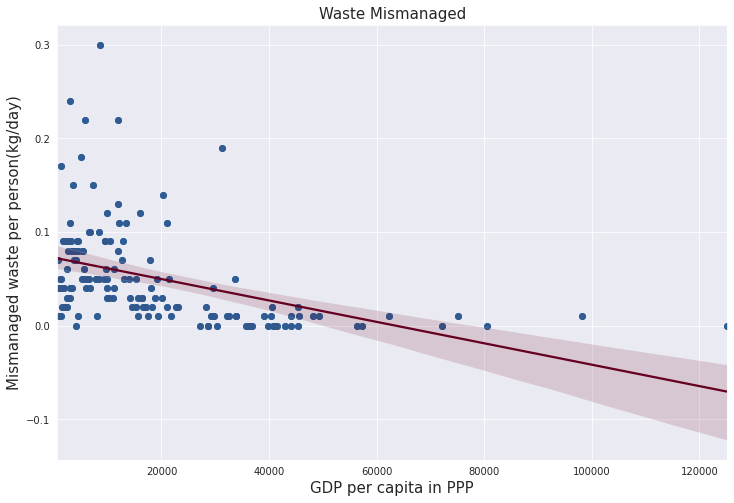

In [ ]:


plt.figure(1,figsize=(12,8))
y=plt.scatter(df_plastic_waste.iloc[:,5],df_plastic_waste.iloc[:,4])
#another way
#plt.scatter(df_plastic_waste['Mismanaged waste per person(kg/day)'], df_plastic_waste['GDP per capita in PPP'])
plt.title('Waste Mismanaged', loc='center', fontsize=15)
plt.ylabel('Mismanaged waste per person(kg/day)', fontsize=15)
plt.xlabel('GDP per capita in PPP', fontsize=15)



sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=df_plastic_waste,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})



plt.show()

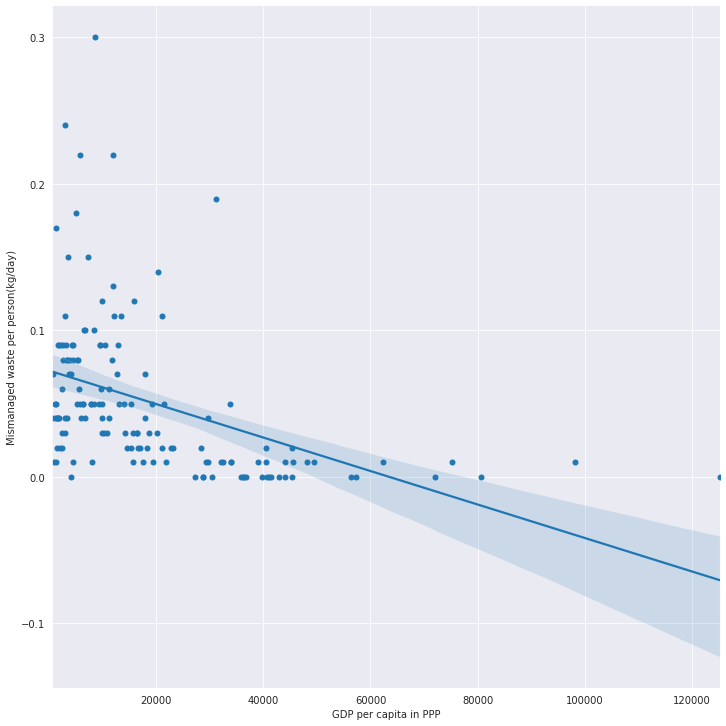

In [ ]:
# Method 2 using Implot
sns.lmplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)',height=10, data=df_plastic_waste,scatter_kws={"s": 25, "alpha": 1})
plt.show()

## Waste Generated by GDP

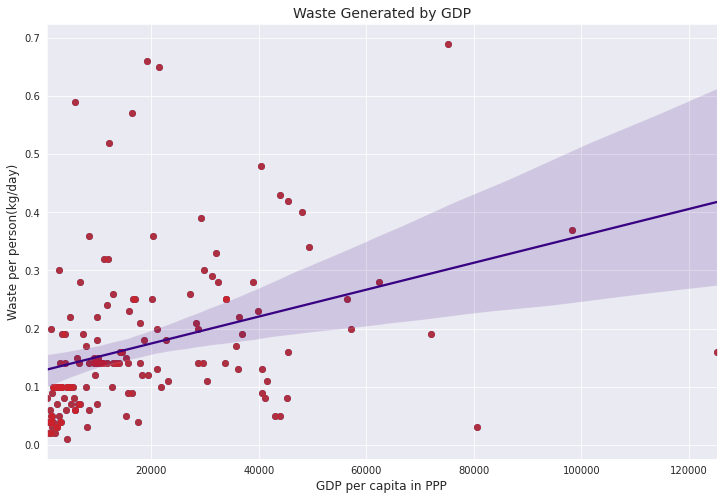

In [ ]:
plt.figure(2, figsize=(12,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)


sns.regplot(x=df_plastic_waste['GDP per capita in PPP'], y=df_plastic_waste['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})